In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import optimize
import math
from scipy import stats
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
mydata = pd.read_csv('data/ex2data1.txt',names=["Score1", "Score2","Admission"])

In [3]:
mydata

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


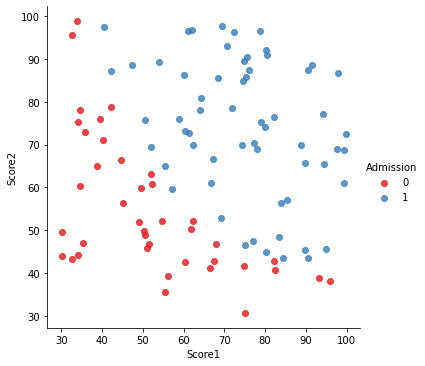

In [4]:
sns.lmplot(x="Score1",y="Score2",hue="Admission",data=mydata,fit_reg=False,palette="Set1")

===================================================================================================
# In this problem we have two features (score1 and score 2) and one target (admission). We create another feature called X0 equal to one in order to have matrix $\theta^TX$ proper size where  $\theta$ is a  $3*1$  matrix. So X is a $3*100$ matrix. y size is $100*1$. Finally,  $\theta^TX$ has  $1*100$ dimention like y.

In [5]:
X0=np.ones(len(mydata))
X1=np.array(mydata["Score1"])
X2=np.array(mydata["Score2"])
y=np.array(mydata["Admission"])

In [6]:
X=np.array([X0,X1,X2]).transpose()
X.shape

(100, 3)

In [7]:
y.shape

(100,)

========================================================================================================
# Logistic Regression Hyphothesis

# $h_{\theta}(x)=g(\theta^T x)$

.
# Where g is sigmoind function

#  $g(z)=\frac{1}{1+e^{-z}}$

In [8]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

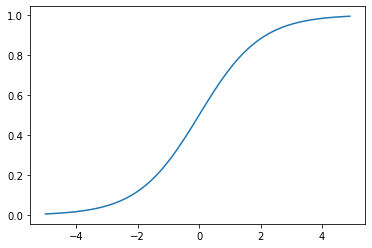

In [9]:

z = np.arange(-5,5,0.1)
plt.plot(z,sigmoid(z))

================================================================================================
# Cost Function
# $J(\theta)=\frac{1}{m}{\sum\limits_{i=1}^{m}}(-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)})))$

In [10]:
def hypothesis(theta,X):
    htheta=sigmoid(np.dot(X,theta))
    return htheta

In [11]:
X.shape

(100, 3)

In [12]:
y.shape

(100,)

In [13]:
def computecost(theta,X,y):
    m=len(y)
    htheta=sigmoid(np.dot(X,theta))
    J = (1 / m) * np.sum(-np.dot(y,(np.log(htheta))) - np.dot((1 - y),(np.log(1 - htheta))))
    return J

In [14]:
theta=np.array([0.,0.,0])
htheta=sigmoid(np.dot(X,theta))
htheta.shape

(100,)

# Check your cosfunction: For $\theta=np.array([0.,0.,0])$ the cost function should be 0.69, and for $\theta = np.array([-24, 0.2, 0.2])$ should be 0.218.

In [15]:
#test example
theta=np.array([0.,0.,0])
computecost(theta,X,y)

0.6931471805599453

In [16]:
#test example
test_theta = np.array([-24, 0.2, 0.2])
computecost(test_theta ,X,y)

0.21833019382659785

================================================================================================
# Gradient Descent
# Show that the cost function decreseae with iteration over gradient descent
#  $\theta_j = \theta_j-\frac{\alpha}{m}{\sum\limits_{i=1}^{m}}(h_{\theta}(x^{(i)})-y^i)x^{(i)}$

In [17]:
def gradientdescent1(theta,X,y,alpha,num_iters):
    m=len(y)
    jhistory=[]
    theta=np.zeros((3))
    for i in range(num_iters):
        htheta=sigmoid(np.dot(X,theta))
        J = (1 / m) * np.sum(-np.dot(y,(np.log(htheta))) - np.dot((1 - y),(np.log(1 - htheta))))
        jhistory.append(J)
        descent1 = (alpha/ m)* np.dot(X.T,(htheta - y))
        theta=theta-descent1
    return theta,jhistory

In [18]:
#test example
m=len(y)
alpha=1
descent1 = (alpha/ m)* np.dot(X.T,(htheta - y))
descent1

array([ -0.1       , -12.00921659, -11.26284221])

In [19]:
#test example
alpha = 0.001
num_iters =500000
theta, jhistory= gradientdescent1(theta, X,y, alpha, num_iters)
theta

array([-11.74749157,   0.09927308,   0.09316497])

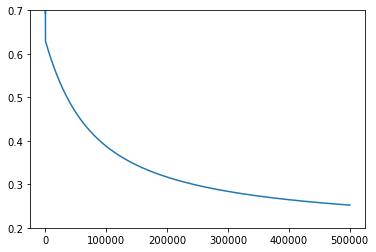

In [20]:
plt.ylim([0.2,0.7])
plt.plot(jhistory)

================================================================================================
# Write the Gradient Descent again and minimize it with opt.fmin_tnc. The minimization gives the values for $\theta$ which are related to the minimum cost function. 

In [21]:
import scipy.optimize as opt

In [22]:
def gradientdescent(theta,X,y):
    m=len(y)
    #theta=np.zeros((3))
    htheta=sigmoid(np.dot(X,theta))
    J = (1 / m) * np.sum(-np.dot(y,(np.log(htheta))) - np.dot((1 - y),(np.log(1 - htheta))))
    descent = (1/m)*np.dot(X.T,(htheta - y))
    return descent

In [23]:
#test example
test_theta = np.array([-24, 0.2,0.2])
descent=gradientdescent(test_theta,X,y)
gradientdescent(test_theta ,X,y)

array([0.04290299, 2.56623412, 2.64679737])

In [24]:
#here are the obtianed values of thetas
result= opt.fmin_tnc(func=computecost,x0 = test_theta.flatten(),fprime=gradientdescent,args=(X,y))
result

(array([-25.1611389 ,   0.20623013,   0.20147005]), 23, 1)

In [25]:
#first element of theta, theta_0
ret=result[0]
ret[0]

-25.16113889566144

================================================================================================
# Plot the obtained $\theta$ with original data
# Note the the plot (decision boundary) is $\theta^TX=0$ which is $\theta_0+\theta_1X^{(1)}+\theta_2X^{(2)}=0$. By solving this equation $X^{(2)}=\frac{-1}{\theta_2}(\theta_0+\theta_1X^{(1)})$ you obtain the green plot below
# $X^{(1)}$ and $X^{(2)}$ are our features.

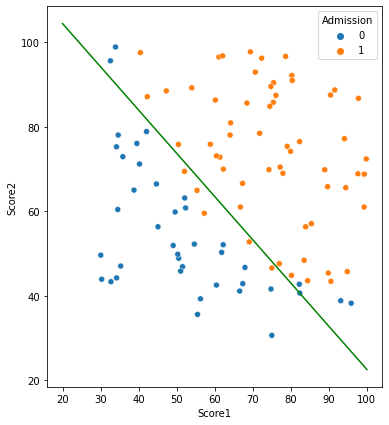

In [26]:
plt.figure(figsize=(6,7))
ax = sns.scatterplot(x="Score1", y="Score2", hue="Admission", data=mydata)
xd = np.array([20, 100])
plot_y = ((-1/ret[2])*(ret[1]*xd + ret[0]))
plt.plot(xd, plot_y, '-', c="green")
plt.show(ax)

### plot decison boundry by plt.contour which solves a function of two variables

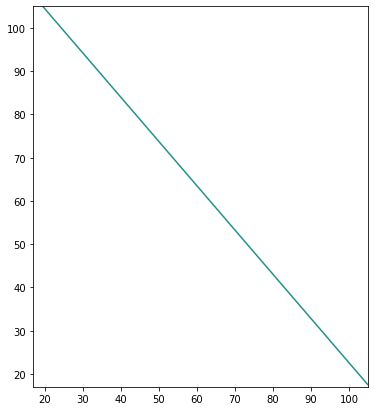

In [32]:
x= np.array([17, 105])
y= np.array([17, 105])

def f(x,y):
    return 25.1611389-x* 0.20623013-0.2014* y

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.figure(figsize=(6,7))
plt.contour(x, y,Z,0)